In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Reading images
img=cv.imread('E:\photos iitb\SAMEER HILL\IMG_2309.jpg');
cv.imshow('rahul',img);
cv.waitKey(0);

In [3]:
## Reading videos
capture=cv.VideoCapture('E://rahul_video.mp4');
while True:
    isTrue, frame=capture.read();
    cv.imshow('video',frame);
    
    if cv.waitKey(20) & 0xFF==ord('d'):
        break
capture.release();
cv.destroyAllWindows()

In [4]:
## Resizing and Rescale
def rescaleFrame(frame,scale=0.75):
    width=int(frame.shape[1]*scale);
    height=int(frame.shape[0]*scale);
    dimension=(width,height);
    
    return cv.resize(frame,dimension, interpolation=cv.INTER_AREA)

In [9]:
capture=cv.VideoCapture('E://rahul_video.mp4');
while True:
    isTrue, frame=capture.read();
    frame_resized1=rescaleFrame(frame,scale=0.2);
    cv.imshow('video_resized',frame_resized1);
    
    if cv.waitKey(20) & 0xFF==ord('d'):
        break
capture.release();
cv.destroyAllWindows()

In [2]:
## Draw shapes on images
blank=np.zeros((500,500,3),dtype='uint8');

In [4]:
cv.imshow('Blank',blank)
cv.waitKey(0)

115

In [3]:
blank[200:300,200:300]=0,0,255;
cv.imshow('red',blank);
cv.waitKey(0)

32

In [5]:
cv.rectangle(blank,(0,0),(blank.shape[0]//2,blank.shape[1]//2),(0,255,0),thickness=2);
cv.imshow('rect',blank);
cv.waitKey(0)

97

In [6]:
## draw circle
cv.circle(blank,(250,250),40,(255,150,100),thickness=-10);
cv.imshow('circle',blank);
cv.waitKey(0);

In [7]:
cv.line(blank,(0,0),(250,250),(255,255,255),thickness=2);
cv.imshow('line',blank);
cv.waitKey(0);

In [10]:
## Text writing
blank=np.zeros((500,500,3),dtype='uint8');
cv.putText(blank,"Hello It's Computer Vision",(0,250),cv.FONT_HERSHEY_TRIPLEX,1,(0,255,0),2);
cv.imshow('Text',blank);
cv.waitKey(0);

# Basic Functions in CV

In [5]:
## BGR TO GRAY
img=cv.imread('E:\photos iitb\SAMEER HILL\IMG_2309.jpg');
img=rescaleFrame(img,scale=0.2);
cv.imshow('rahul',img);

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY);
cv.imshow('gray',gray);
cv.waitKey(0);

In [7]:
## BLUR
blur=cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT);
cv.imshow('blur',blur);
cv.waitKey(0);

In [11]:
## Edge Detector
canny=cv.Canny(img,100,175);
cv.imshow('canny',canny);
## using blurr we can reduce egdes
blur_canny=cv.Canny(blur,125,175);
cv.imshow('blur_edge',blur_canny);
cv.waitKey(0);


In [14]:
## Dialating images(Edge Thickning)
dialate=cv.dilate(canny,(5,5),iterations=3);
cv.imshow('dialated',dialate);

## Erode image (opposite to dialate)
erode=cv.erode(dialate,(5,5),iterations=3);
cv.imshow('erode',erode);
cv.waitKey(0)

100

In [16]:
## resize without maintaining aspect ratio
resized=cv.resize(img,(500,500),interpolation=cv.INTER_AREA);
cv.imshow('resized',resized);

## crop
cropped=resized[100:300,100:300];
cv.imshow('cropped',cropped);
cv.waitKey(0)

109

In [17]:
## Image Transformation
def Translate(image,x,y):
    transMat=np.float32([[1,0,x],[0,1,y]]);
    dimension=(image.shape[1],image.shape[0]);
    return cv.warpAffine(image,transMat,dimension)
#-x=left
#-y=up
#x=right
#y=down

In [20]:
translated=Translate(img,50,100);
cv.imshow('translated',translated);
cv.waitKey(0)

99

In [23]:
## rotate an image
def rotate(image,angle,RotPoint=None):
    (height,width)=image.shape[:2];
    if RotPoint is None:
        RotPoint=(width//2,height//2)
    rotMat=cv.getRotationMatrix2D(RotPoint,angle,1.0);
    dimension=(width,height);
    return cv.warpAffine(image,rotMat,dimension)

In [26]:
rotated=rotate(img,-15);
cv.imshow('rotated',rotated);
cv.waitKey(0)

97

In [27]:
resized=cv.resize(img,(300,300),interpolation=cv.INTER_AREA)
cv.imshow('resized',resized);
cv.waitKey(0);

In [28]:
## Flipping
# 0=Horizontal, 1=vertical, -1 = Horizontal and vertical flip
flipped=cv.flip(img,0);
cv.imshow('flipped',flipped);
cv.waitKey(0);

In [9]:
##split and merge
pic=cv.imread('E:\\IMG_2508.jpg');
resized=cv.resize(pic,(300,200),interpolation=cv.INTER_AREA);
cv.imshow('BGR',resized);
cv.waitKey(0);

In [11]:
b,g,r=cv.split(resized);
cv.imshow('Blue',b);
cv.imshow('green',g);
cv.imshow('red',r);
cv.waitKey(0);

In [12]:
blank=np.zeros(resized.shape[:2],dtype='uint8');
red=cv.merge([blank,blank,r]);
green=cv.merge([blank,g,blank]);
blue=cv.merge([b,blank,blank]);
cv.imshow('Blue',blue);
cv.imshow('green',green);
cv.imshow('red',red);
cv.waitKey(0);

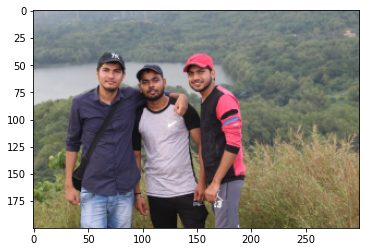

In [13]:
rgb=cv.merge([r,g,b]);
plt.imshow(rgb)

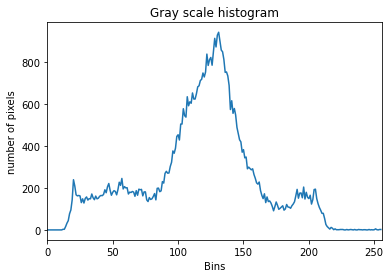

In [14]:
## Histograme Computation
## for gray scale image
gray=cv.cvtColor(resized,cv.COLOR_BGR2GRAY);
cv.imshow('gray',gray);
gray_hist=cv.calcHist([gray],[0],None,[256],[0,256]);
plt.figure()
plt.title('Gray scale histogram');
plt.xlabel('Bins')
plt.ylabel('number of pixels')
plt.plot(gray_hist);
plt.xlim([0,256]);
plt.show()

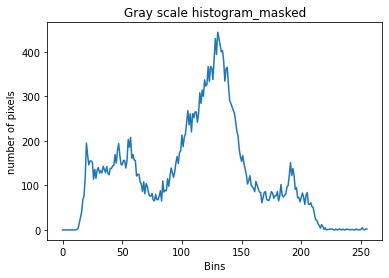

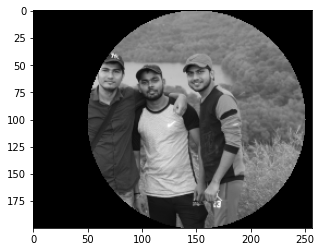

In [21]:
## Masking
blank=np.zeros(resized.shape[:2],dtype='uint8');
circle=cv.circle(blank,(resized.shape[1]//2,resized.shape[0]//2),100,255,-1);
mask=cv.bitwise_and(gray,circle);

gray_hist=cv.calcHist([gray],[0],mask,[256],[0,256]);
plt.figure()
plt.title('Gray scale histogram_masked');
plt.xlabel('Bins')
plt.ylabel('number of pixels')
plt.plot(gray_hist);
plt.figure()
plt.imshow(mask,cmap='gray')
plt.xlim([0,256]);
plt.show()


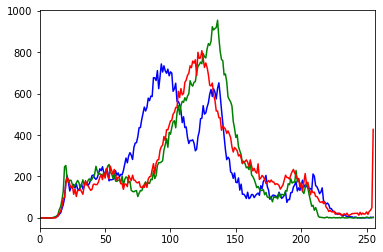

In [22]:
## colored image histogram
col=('b','g','r');
for i, c in enumerate(col):
    hist=cv.calcHist([resized],[i],None,[256],[0,256]);
    plt.plot(hist,color=c);
    plt.xlim([0,256]);

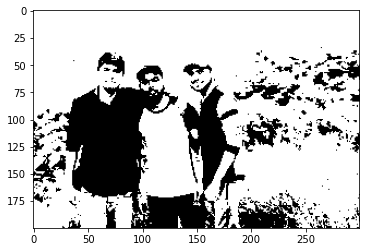

In [26]:
## Thresholding of image(Binary Image)
## on gray scale image
threshold,thres=cv.threshold(gray,100,255,cv.THRESH_BINARY);
plt.imshow(thres,cmap='gray')

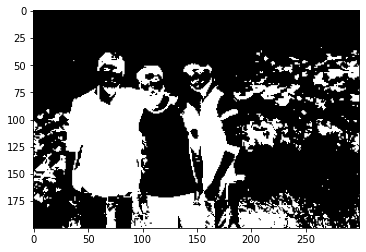

In [27]:
##Inverse thresholded image
threshold,thres_inv=cv.threshold(gray,100,255,cv.THRESH_BINARY_INV);
plt.imshow(thres_inv,cmap='gray')

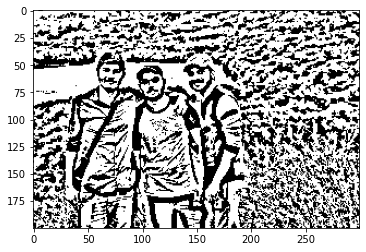

In [29]:
## Adaptive Thresholding
adaptive_thresh=cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,3);
plt.imshow(adaptive_thresh,cmap='gray')

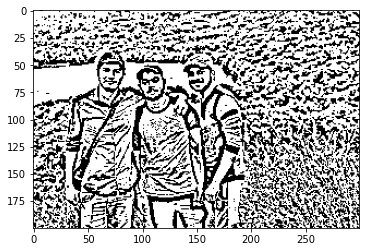

In [30]:
adaptive_thresh=cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,3);
plt.imshow(adaptive_thresh,cmap='gray')

# Edge Detection, Gradients

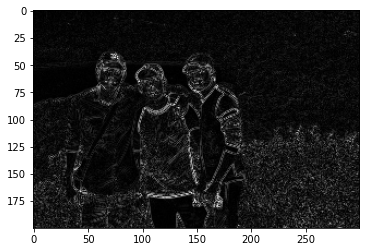

In [31]:
##Laplacian (gray image)
lap=cv.Laplacian(gray,cv.CV_64F)
lap=np.uint8(np.absolute(lap))
plt.imshow(lap,cmap='gray')

Text(0.5, 1.0, 'combined_sobel')

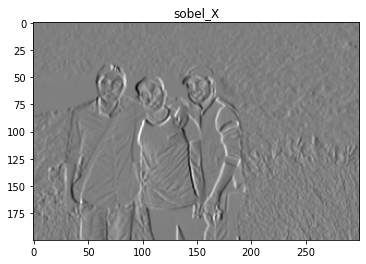

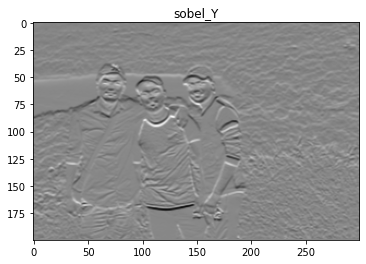

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:481: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


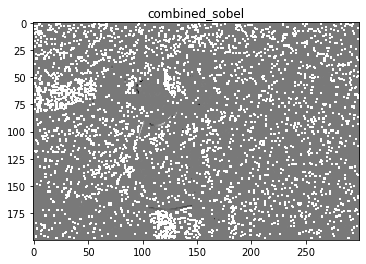

In [32]:
## sobel (gradient in x and y direction)
sobelx=cv.Sobel(gray,cv.CV_64F,1,0);
sobely=cv.Sobel(gray,cv.CV_64F,0,1);
combined_sobel=cv.bitwise_or(sobelx,sobely);
plt.figure();
plt.imshow(sobelx,cmap='gray');
plt.title('sobel_X')
plt.figure();
plt.imshow(sobely,cmap='gray');
plt.title('sobel_Y')
plt.figure();
plt.imshow(combined_sobel,cmap='gray');
plt.title('combined_sobel')


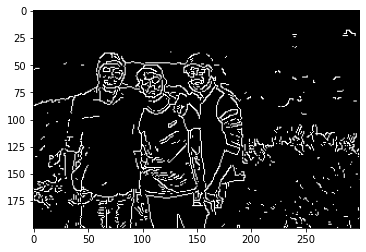

In [33]:
## canny edge
canny=cv.Canny(gray,150,175);
plt.imshow(canny,cmap='gray');